https://mathematica.stackexchange.com/questions/178498/how-to-numerically-solve-the-schr%C3%B6dinger-equation-for-lennard-jones-potential
https://mathematica.stackexchange.com/questions/32293/find-eigen-energies-of-time-independent-schr%c3%b6dinger-equation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import scipy
from scipy import interpolate
from scipy import integrate
Npts = 7500 # number of iterator steps
H_to_K = 1/0.000003166808534191

# $V(r) = \frac{C_{12}}{r^{12}} - \frac{C_{6}}{r^{6}}$
## $C_{12} = 3.05\times10^{8} E_{h}a_{0}$, $C_{6} = 4710 E_{h}a_{0}$

 dr = 0.007467662354980753
-0.018183674629667836


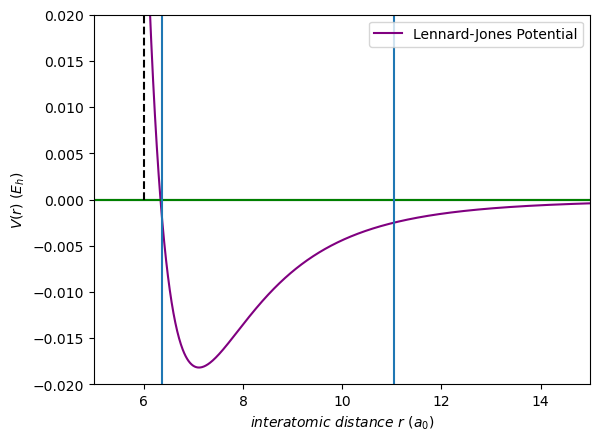

In [64]:
tol = 1e-4
r = np.linspace(4,60, Npts) # range of r values to iterate over, 4 -> 60 Bohr radii
#r_pot = np.linspace(4,60, N) # range of r values to iterate over, ~0 -> 60 Bohr radii
dr = r[1] - r[0] # spacing dr
print(f' dr = {dr}')
psi = np.zeros(Npts)  # Initializing psi(r) as array of zeros

C12 = 3.05e8 #C12 coefficient in Eh*ao
C6 = 4710 #C6 coefficient in Eh*ao
Vr = (C12/(r**12)) - (C6/(r**6))
Eo = 1e5*3.166808534191e-12 # inital particle energy, 1uK in Hartrees
me = 9.1093837e-28 # electron mass in grams
mrb_g = 1.4192261e-22 # rubidium mass in grams
mrb = mrb_g/me # rubidium mass in au
mu = (mrb**2)/(2*mrb) # reduced mass of rubidium
hbar = 1.0546e-27 # reduced Planck constant in cgs
e = 4.8032e-10 # electron charge in cgs
ao = (hbar**2)/(me*e**2) # Bohr radius in cgs


#print(f' mu = {mu}')
plt.plot(r, Vr, label = 'Lennard-Jones Potential', color = 'purple')
plt.hlines(0,0, max(r), color = 'black')
plt.hlines(Eo,0, max(r), color = 'green')
plt.vlines(6, 0, max(r), color = 'black', linestyle = 'dashed')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{0})$')
plt.ylabel('$V(r)$ $(E_{h})$')
plt.ylim(-0.02, 0.02)
plt.xlim(5,15)
plt.legend()

print(min(Vr))
plt.vlines(6.375,-0.02,0.02)
plt.vlines(11.04,-0.02,0.02)

In [5]:
def r_solver(Vc, C6, C12):
    Rval = []
    
    r1 = -1*(2**(-1/6))*((-1*(C6/Vc) - ((np.sqrt((C6**2) + 4*C12*Vc))/Vc))**(1/6))
    
    r2 = (2**(-1/6))*((-1*(C6/Vc) - ((np.sqrt((C6**2) + 4*C12*Vc))/Vc))**(1/6))
    
    r3 = -1*((-1)**(1/3))*(2**(-1/6))*((-1*(C6/Vc) - ((np.sqrt((C6**2) + 4*C12*Vc))/Vc))**(1/6))
    
    r4 = ((-1)**(1/3))*(2**(-1/6))*((-1*(C6/Vc) - ((np.sqrt((C6**2) + 4*C12*Vc))/Vc))**(1/6))
    
    r5 = -1*((-1)**(2/3))*(2**(-1/6))*((-1*(C6/Vc) - ((np.sqrt((C6**2) + 4*C12*Vc))/Vc))**(1/6))
    
    r6 = ((-1)**(2/3))*(2**(-1/6))*((-1*(C6/Vc) - ((np.sqrt((C6**2) + 4*C12*Vc))/Vc))**(1/6))
    
    r7 = -1*(2**(-1/6))*((-1*(C6/Vc) + ((np.sqrt((C6**2) + 4*C12*Vc))/Vc))**(1/6))
    
    r8 = (2**(-1/6))*((-1*(C6/Vc) + ((np.sqrt((C6**2) + 4*C12*Vc))/Vc))**(1/6))
    
    r9 = -1*((-1)**(1/3))*(2**(-1/6))*((-1*(C6/Vc) + ((np.sqrt((C6**2) + 4*C12*Vc))/Vc))**(1/6))
    
    r10 = ((-1)**(1/3))*(2**(-1/6))*((-1*(C6/Vc) + ((np.sqrt((C6**2) + 4*C12*Vc))/Vc))**(1/6))
    
    r11 = -1*((-1)**(2/3))*(2**(-1/6))*((-1*(C6/Vc) + ((np.sqrt((C6**2) + 4*C12*Vc))/Vc))**(1/6))
    
    r12 = ((-1)**(2/3))*(2**(-1/6))*((-1*(C6/Vc) + ((np.sqrt((C6**2) + 4*C12*Vc))/Vc))**(1/6))
    
    Rval.append(r2)
    Rval.append(r3)
    Rval.append(r4)
    Rval.append(r5)
    Rval.append(r6)
    Rval.append(r7)
    Rval.append(r8)
    Rval.append(r9)
    Rval.append(r10)
    Rval.append(r11)
    Rval.append(r12)

    #print(np.imag(Rval[6]))

    realr = []
    for i in range(len(Rval)):
        if abs(np.conj(Rval[i]) - Rval[i]) == 0:
            if Rval[i] > 0:
                realr.append(Rval[i])
    return np.sort(realr)

# In general, DVR has
## $T_{ii} = \frac{\hbar^2}{2m(dx)^2} \frac{\pi^2}{3}$, diagonal KE elements
## $T_{ij} = \frac{\hbar^2(-1)^{i-j}}{m(dx)^2} \frac{1}{(i-j)^2}$, off diagonal KE elements

## $V_{ij} = \delta_{ij} V(x_{j}) $, diagonal potential energy matrix
## with $x_{i} = i*dx$, $i=0,\pm1,\pm2,...$, uniformly spaced grid of posistion

## so that
## $H_{ii} = \frac{\hbar^2}{2m(dx)^2} \frac{\pi^2}{3} + V(x_{i})$, diagonal Hamiltonian elements
## $H_{ij} = T_{ij} = \frac{\hbar^2(-1)^{i-j}}{m(dx)^2} \frac{1}{(i-j)^2}$, off diagonal Hamiltonian elements

# For Lennard-Jones with a.u., $\hbar \to 1, m \to \mu, x \to r$

## $T_{ii} = \frac{1}{2 \mu (dr)^2} (\frac{\pi^2}{3} - \frac{1}{2i^2})$, diagonal KE elements
## $T_{ij} = \frac{(-1)^{i-j}}{\mu (dr)^2}( \frac{1}{(i-j)^2} - \frac{1}{(i+j)^2}) $, off diagonal KE elements

## $V_{ii} = \frac{C_{12}}{r_{i}^{12}} - \frac{C_{6}}{r_{i}^6} $, diagonal potential energy matrix, with off diagonals being equal to zero
## $r_{i} = i*dr, i = 1, 2, ...$

# $H_{ii} = \frac{1}{2 \mu (dr)^2} (\frac{\pi^2}{3} - \frac{1}{2i^2}) + \frac{C_{12}}{r_{i}^{12}} - \frac{C_{6}}{r_{i}^6}$, diagonal Hamiltonian elements
# $H_{ij} = T_{ij} = \frac{(-1)^{i-j}}{\mu (dr)^2}( \frac{1}{(i-j)^2} - \frac{1}{(i+j)^2}) $, off diagonal Hamiltonian elements

In [8]:
def Hamiltonian_DVR(rmin, rmax, red_mass, dr, Vc):
    # Build the Hamiltonian Matrix for Lennard Jones using DVR
    # Takes in a rmin and rmax to build a grid, a spacing dr, and a cutoff energy Vc
    
    #N = int(2*np.sqrt(2*abs(Vc))*(1/dr)) # Number of pts
    #if N % 2 == 0: # require N odd for symmetry around 0
     #   N += 1
    N = int((rmax - rmin)/dr + 1)

    print(f' N = {N}')

    #rmin = r_solver(Vc, C6, C12)[0]
    #rmax = r_solver(Vc, C6, C12)[1]
    r = np.linspace(rmin, rmax, N) # r grid to determine Hamiltonian
    rprime = np.insert(r, 0, 0)
    #print(f'rp ={rprime}')

    #print(f' r[1] - r[0] = {r[1] - r[0]}')

    
    VLJ = (C12/(r**12)) - (C6/(r**6))
    VLJmin = abs(min(VLJ))

    #print(f'Vmin = {VLJmin}')

    #plt.plot(r, VLJ + VLJmin, color = 'fuchsia')

    assert(len(rprime) - len(r) == 1)
    
    H_DVR = np.zeros((len(rprime),len(rprime))) # Initialize an empty matrix of zeros
    
    offset = 0 # offset to ensure mapping is correct

    # NOTE on OFFSET: Since i = 1, 2, ... we have to add offset so that when we index w/ numpy we correctly map the values, ie -n -> 0, -n + 1 -> 1, since Numpy starts its count at i=0
    
    for i in range(1, len(rprime)): # let i be the rows, start on a row, from -len(xp)/2 to len(xp)/2
        
        for j in range(1, len(rprime)): # Let j be the columns, for a given row i, run along columns and calculate Hij
            
            if i == j: # This will calculate diagonal components of H
                H_DVR[i + offset][j + offset] = 0.5*(1/red_mass)*(1/(dr**2))*((1/3)*(np.pi**2) + 0.5*(1/(i**2))) + C12*(1/(rprime[i + offset]**12)) + -1*C6*(1/(rprime[i + offset]**6)) # Fill out diagonal elements according to DVR method
            
            if i != j: # This will calculate off-diagonal components of H
                H_DVR[i + offset][j + offset] = (1/red_mass)*(1/(dr**2))*((-1**(i-j)))*((1/((i-j)**2)) - (1/((i+j)**2)))  # Fill out off diagonal elements according to DVR method

    H_DVR = np.delete(H_DVR, 0, 0)
    H_DVR = np.delete(H_DVR, 0, 1)
    
    assert(np.allclose(H_DVR, np.transpose(H_DVR))) # Assert Hamilitonian is real symmetric
        

    return H_DVR

Vmin = -0.018183686365220178 Eh


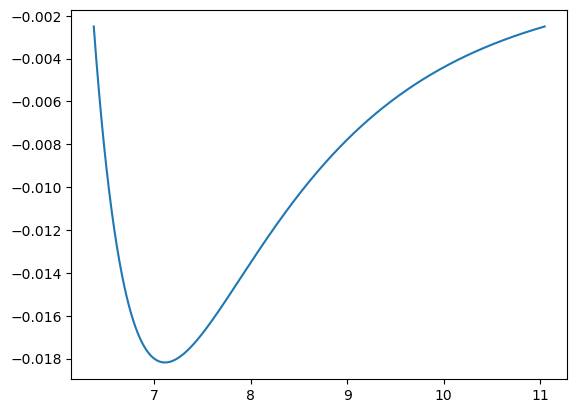

In [9]:
drp = 0.8 # step size in ao
Vcp = -0.0025

#Np = int(2*np.sqrt(2*abs(Vcp))*(1/drp)) # Number of pts
#if Np % 2 == 0: # require N odd for symmetry around 0
 #   Np += 1
#print(f' Np = {Np}')

r1 = 6 # ao
r2 = 10 # ao
#Np = int((r2-r1)/drp + 1)
rp = np.linspace(r1,r2, Np)
#print(f' len(rp) = {len(rp)}')
#print(rp[-1])
Vrp = (C12/(rp**12)) - (C6/(rp**6))
plt.plot(rp,Vrp)
Vmin = min(Vrp)
print(f'Vmin = {Vmin} Eh')
#print(rp)

#print(rp[1] - rp[0])

#print(mu)

In [10]:
H = Hamiltonian_DVR(mu, drp, Vcp)
#plt.ylim(-0.02,0.03)
#plt.xlim(0,15)

 N = 1414


In [11]:
print(f'H = {H[1]}')

H = [-1.14107681e+03  2.19184989e+03 -1.23236295e+03 ... -3.64800178e-06
 -3.64026201e-06 -3.63254412e-06]


In [29]:
EigenvecMatrix = np.linalg.eigh(H)[1]
print(EigenvecMatrix)
Hvecp = []

Heigp = np.linalg.eigh(H)[0]

#for i in range(len(Heigp)):
 #   Heig += Vmin


for i in range(len(H[0])):
    Hvecp.append(EigenvecMatrix[:,i])

print(len(Heigp))

print(f' int before = {np.trapz(np.abs(Hvecp[0])**2,rp)}')

for i in range(len(Hvecp)):
    INT = np.trapz(np.abs(Hvecp[i])**2, rp)
    A = 1/np.sqrt(INT)
    Hvecp[i] = A*Hvecp[i]

print(len(Hvecp))

print(Heigp)

print(f' int after = {np.trapz(np.abs(Hvecp[0])**2,rp)}')

[[ 7.20123091e-05 -1.56962127e-04  2.39778081e-04 ... -2.43407772e-04
  -1.29822177e-04 -3.13079693e-05]
 [ 1.44024359e-04 -3.13921588e-04  4.79546453e-04 ...  4.86801733e-04
   2.59640132e-04  6.26154998e-05]
 [ 2.16035882e-04 -4.70875702e-04  7.19295385e-04 ... -7.30168211e-04
  -3.89449718e-04 -9.39221703e-05]
 ...
 [ 2.29435320e-03  3.38075740e-03  4.21284498e-03 ...  7.56470898e-04
  -5.54028415e-04  4.15565429e-04]
 [ 1.85479248e-03  2.72704157e-03  3.39169636e-03 ... -4.95704359e-04
   3.63039743e-04 -2.72304703e-04]
 [ 1.27430314e-03  1.86886304e-03  2.31916263e-03 ...  2.27499651e-04
  -1.66612430e-04  1.24969699e-04]]
1414
 int before = 0.0033057368686357424
1414
[-2103.7812969  -2094.8497728  -2085.91331687 ...  4223.20230991
  4223.21785688  4223.22973203]
 int after = 0.9999999999999999


In [21]:
Hneg = Heig[Heig < 0]
Hwell = Hneg[Hneg > Vmin]

print(len(Hwell))
print(len(Hneg))

print(Heigp[0:10])

#plt.hlines(Hneg, 0, 1)
#plt.ylim(-10000, 0)

#print(f' H = {H}')
print(H.shape)

NameError: name 'Heig' is not defined

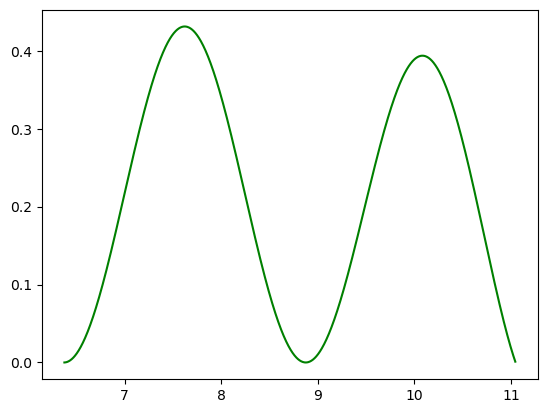

In [27]:
#print( np.matmul(H, Hvec[1]) - Heig[1]*Hvec[1])

#plt.plot(rp, np.matmul(H, Hvec[1]) - Heig[1]*Hvec[1])

#plt.plot(rp, Vrp, color = 'fuchsia')
plt.plot(rp, np.abs(Hvecp[1])**2, color = 'green')
#plt.plot(rp, 1000*np.abs(EigenvecMatrix[2])**2 + Heig[0], color = 'blue')
#plt.vlines(r1, 0, max(np.abs(Hvec[0])**2), color = 'black')
#plt.plot(rp, (C12/(rp**12)) - (C6/(rp**6)), color = 'purple')


#plt.ylim(-5, 1)
#plt.xlim(0,15)

In [ ]:
M = np.array([[0,1,2],[1,2,3],[2,3,4]])
print(M)

MP = np.delete(M, 0, 1)
print(MP)
MP = np.delete(MP,0,0)
print(MP)

In [ ]:
r_solver(-0.0025, C6, C12)